In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from scipy.stats import norm

plt.rcParams['figure.dpi'] = 85
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['legend.title_fontsize'] = 16
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 4.32
plt.rcParams['ytick.minor.size'] = 2.46
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['ytick.minor.width'] = 1.2

# Figure 13: Plot the priors alongside the data
### Define some global variables

In [2]:
home = '/oak/stanford/orgs/kipac/users/mahlet/bias/'

In [3]:
z_array = [0, 0.5, 1, 1.5]

cmap_red = plt.get_cmap('Reds')(np.linspace(0.333, 0.999, 4))
cmap_blue = plt.get_cmap('Blues')(np.linspace(0.333, 0.999, 4))
cmap_total = plt.get_cmap('Purples')(np.linspace(0.333, 0.999, 4))
color_red = cmap_red[1] 
color_blue = cmap_blue[1]
color_total = cmap_total[1] 

In [4]:
Lbox = 205

In [5]:
k1_idx = np.load(home + 'data/k1_idx.npy')
colors_patch = ['red', 'blue', 'purple']
labels = ['Quenched', 'Star-Forming', '$M_*$-Selected']
hodtypes = ['TNG', 'UM', r'$-\frac{2}{7}(b_1-1)$', 'Barreira+ (2021)']
colors_cmap_patch = [color_red, color_blue, color_total] 
cmap_patch = [cmap_red, cmap_blue, cmap_total]

### Define some functions

In [6]:
def error(hodtype, z, color, density, AB = ''):

    invmats = np.load(home + 'data/'+AB+'mpiinvmat_%shod_z%s_Ndown1_nbias5_%s_%s.npy'%(hodtype, z, color, density))
    nbar = np.load(home + 'data/'+AB+'mpinbar_%shod_z%s_Ndown1_nbias5_%s_%s.npy'%(hodtype, z,color, density))
    covvals = invmats.real[k1_idx]/nbar/Lbox**3  # divided by 2pi/dk is the same as times dx

    return np.sqrt(np.diag(covvals))

In [7]:
def f(b1, *params):
    return np.polynomial.polynomial.polyval(b1, params)

### Use curvefit to fit the data by galaxy type

In [8]:
data, errors, c, pcov = dict(), dict(), dict(), dict()
covvals_array = dict()
files = ['x_scatter_b1', 'y_scatter_b2', 'y_scatter_bs2', 'y_scatter_bnabla2', 'y_scatter_b3']
order = [1, 2, 2, 1, 3]
for color in ['red', 'blue', 'total']:
    
    data[color], errors[color], c[color], pcov[color] = dict(), dict(), dict(), dict()
    covvals_array[color] = np.load(home+'data/priors/covvals_'+color+'.npy')
    
    for j in range(len(files)):
    
        data[color][j] = np.load(home+'data/priors/'+files[j]+'_'+color+'.npy')
        errors[color][j] = [np.sqrt(np.diag(i))[j] for i in covvals_array[color]]
    
        if j>=1:
            
            c[color][j], pcov[color][j] = curve_fit(f, data[color][0], data[color][j], p0=np.ones(order[j]+1), sigma = errors[color][j])

<>:58: SyntaxWarning: invalid escape sequence '\s'
<>:78: SyntaxWarning: invalid escape sequence '\s'
<>:58: SyntaxWarning: invalid escape sequence '\s'
<>:78: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_135128/429150938.py:58: SyntaxWarning: invalid escape sequence '\s'
  grid0.text(0.025, 0.85, ylabel[i]+'$(b_1)=$'+fit[i]+'\n$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)
/tmp/ipykernel_135128/429150938.py:78: SyntaxWarning: invalid escape sequence '\s'
  second_legend = grid0.legend(custom_lines, ['mean', '1$\sigma$'], loc = 'lower left')


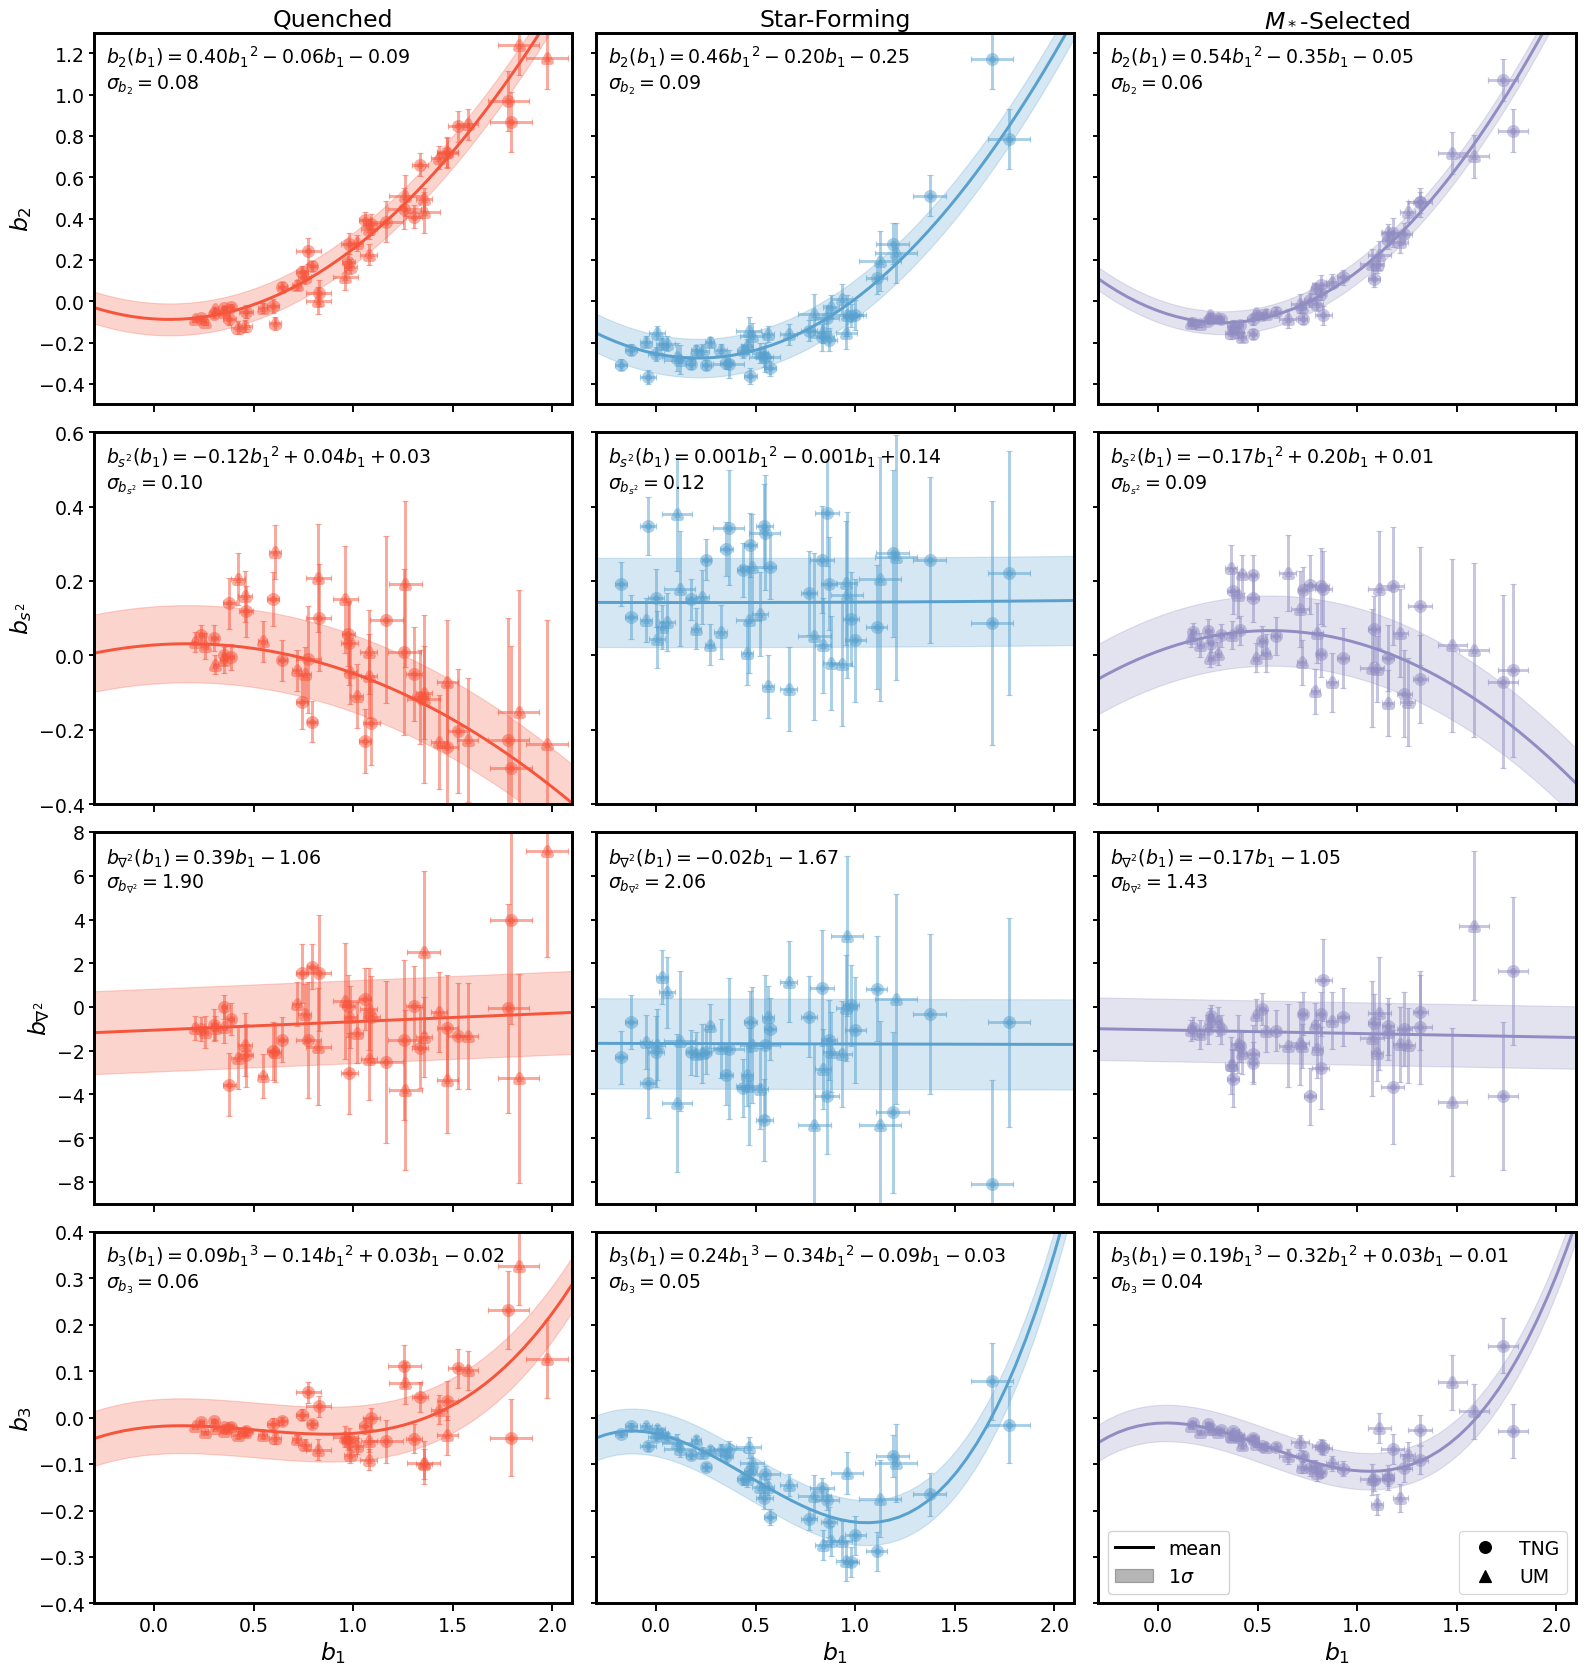

In [9]:
ylabel = ['$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
xlim = -0.3, 2.1 
b1_L_fit = np.linspace(xlim[0], xlim[1])
labels = ['Quenched', 'Star-Forming', '$M_*$-Selected']

plt.figure(figsize = (22.5,24))
grid = gridspec.GridSpec(4, 3)
grid.update(wspace = 0.05, hspace = 0.075)

# plot by galaxy type
idx = [[0,3,6,9],[1,4,7,10],[2,5,8,11]]
for color, plot_color, k in zip(['red', 'blue', 'total'], colors_cmap_patch, range(len(colors_cmap_patch))):        

    fit = ['${:.2f}{{b_1}}^2{:+.2f}b_1{:+.2f}$'.format(c[color][1][2], c[color][1][1], c[color][1][0]), 
       '${:.2f}{{b_1}}^2{:+.2f}b_1{:+.2f}$'.format(c[color][2][2], c[color][2][1], c[color][2][0]), 
       '${:.2f}b_1{:+.2f}$'.format(c[color][3][1], c[color][3][0]), 
       '${:.2f}{{b_1}}^3{:+.2f}{{b_1}}^2{:+.2f}b_1{:+.2f}$'.format(c[color][4][3], c[color][4][2], c[color][4][1], c[color][4][0])]
    if k == 1:
        fit[1] = '${:.3f}{{b_1}}^2{:+.3f}b_1{:+.2f}$'.format(c[color][2][2], c[color][2][1], c[color][2][0])
    for i, ylim in zip(range(len(ylabel)), [(-0.5, 1.3), (-0.4, 0.6), (-9, 8), (-0.4, 0.4)]): 

        grid0 = plt.subplot(grid[idx[k][i]])
        polyfit = np.polynomial.polynomial.polyval(b1_L_fit, c[color][i+1])
        sigma = np.std(data[color][i+1]-np.polynomial.polynomial.polyval(data[color][0], c[color][i+1]))
        grid0.plot(b1_L_fit, polyfit, color = plot_color, linewidth = 2.5, linestyle = '-', zorder = 0)
        grid0.fill_between(b1_L_fit, polyfit-sigma, polyfit+sigma, color = plot_color, alpha = 0.25) 
   
        for hodtype, marker in zip(hodtypes, ['o','^']):
            for density in ['low', 'high', 'medium']:
                for z, j in zip(z_array, range(len(z_array))):
                    
                    biasval = np.load(home + 'data/AB_mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                  density+'.npy')

                    # load error bars
                    err = error(hodtype, z, color, density, AB = 'AB_')
                    
                    grid0.scatter(biasval[:,0][k1_idx], biasval[:,i+1][k1_idx], color = plot_color, marker = marker, 
                              linewidth = 5, zorder = 3, alpha = 0.5) 
                    grid0.errorbar(biasval[:,0][k1_idx], biasval[:,i+1][k1_idx], xerr = err[0], yerr = err[i+1], 
                               color = plot_color, fmt = 'none', elinewidth = 2.5, capsize = 2.5, alpha = 0.5)
                        
                    # plot original
                    biasval = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                  density+'.npy')

                    # load error bars
                    err = error(hodtype, z, color, density)

                    grid0.scatter(biasval[:,0][k1_idx], biasval[:,i+1][k1_idx], color = plot_color, marker = marker, 
                              linewidth = 5, zorder = 3, alpha = 0.5) 
                    grid0.errorbar(biasval[:,0][k1_idx], biasval[:,i+1][k1_idx], xerr = err[0], yerr = err[i+1], 
                               color = plot_color, fmt = 'none', elinewidth = 2.5, capsize = 2.5, alpha = 0.5)
                    
                grid0.set_xlim(np.array(xlim))
                grid0.set_ylim(np.array(ylim))

        grid0.text(0.025, 0.85, ylabel[i]+'$(b_1)=$'+fit[i]+'\n$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)
        if idx[k][i]%3!=0:
            grid0.set_yticklabels([])
        else:
            grid0.set_ylabel(ylabel[i])
        if idx[k][i]<9:
            grid0.set_xticklabels([])
        else:
            grid0.set_xlabel('$b_1$')
        if i == 0:
            grid0.set_title(labels[k])

        
custom_lines = [Line2D([0], [0], color = 'black', markersize = 10, marker = 'o', linestyle = 'None'), 
                Line2D([0], [0], color = 'black', markersize = 10, marker = '^', linestyle = 'None')]
second_legend = grid0.legend(custom_lines, hodtypes, loc = 'lower right')
grid0.add_artist(second_legend)

custom_lines = [Line2D([0], [0], color = 'black', markersize = 10, linewidth = 2.5, linestyle = '-'), 
                mpatches.Patch(color='black', alpha = 0.25)]
second_legend = grid0.legend(custom_lines, ['mean', '1$\sigma$'], loc = 'lower left')
grid0.add_artist(second_legend)

plt.savefig(home + 'figures/Figure13.pdf', dpi = 300, bbox_inches='tight')
plt.show()

### Check that the residuals are Gaussian

<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_135128/373423709.py:5: SyntaxWarning: invalid escape sequence '\h'
  ylabel_res = ['$b_2-\hat{b_2}$', '$b_{s^2}-\hat{b_{s^2}}$', r'$b_{\nabla^2}-\hat{b_{\nabla^2}}$', '$b_3-\hat{b_3}$']
/tmp/ipykernel_135128/373423709.py:5: SyntaxWarning: invalid escape sequence '\h'
  ylabel_res = ['$b_2-\hat{b_2}$', '$b_{s^2}-\hat{b_{s^2}}$', r'$b_{\nabla^2}-\hat{b_{\nabla^2}}$', '$b_3-\hat{b_3}$']
/tmp/ipykernel_135128/373423709.py:5: SyntaxWarning: invalid escape sequence '\h'
  ylabel_res

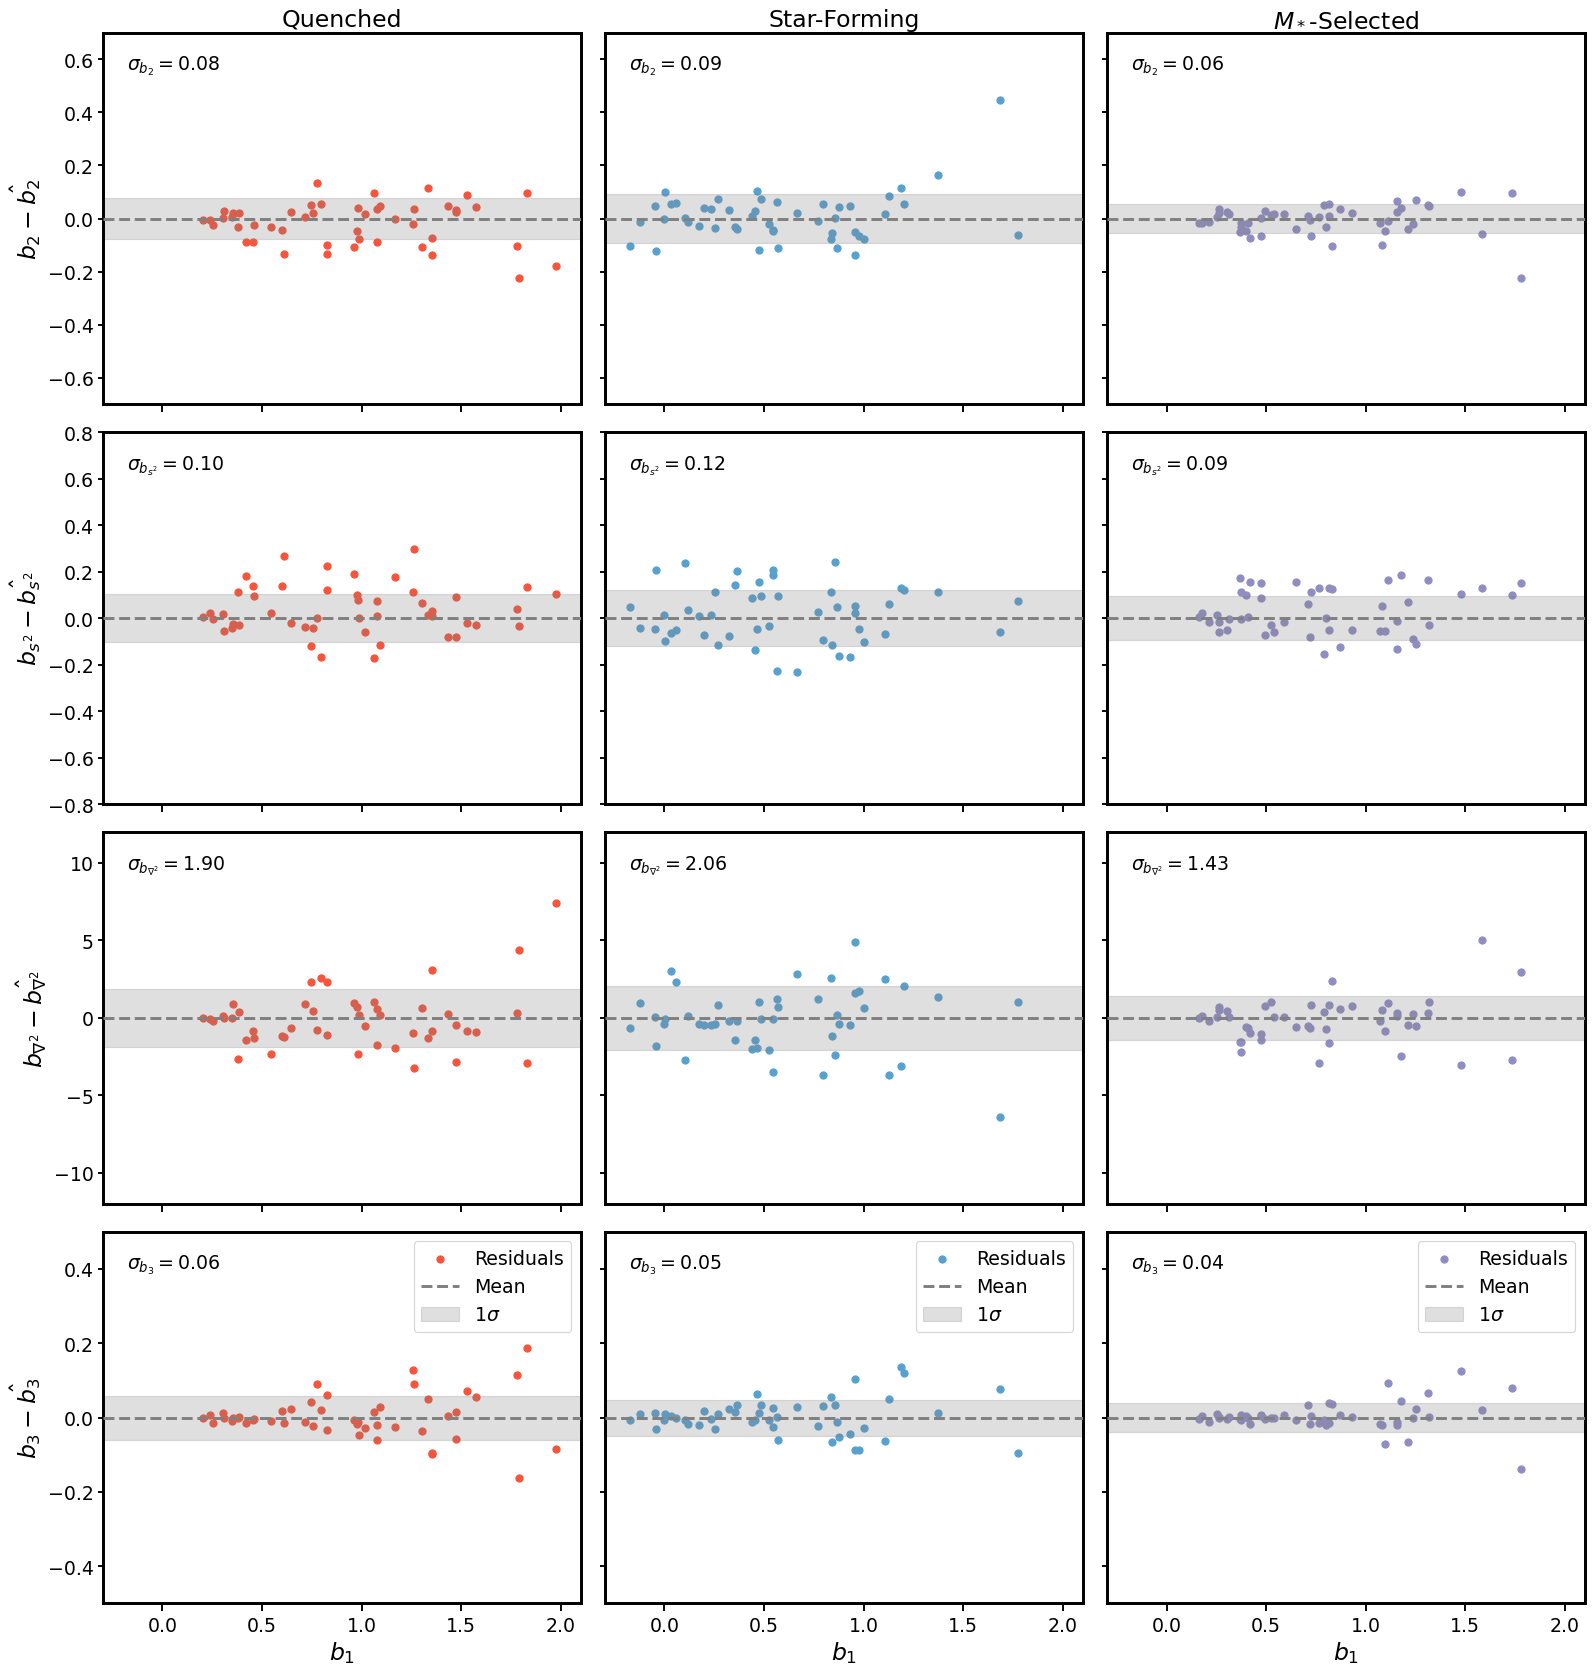

In [10]:
color_zennaro = 'indigo' 
color_barreira = 'black'
color_thiswork = 'grey'
ylabel = ['$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
ylabel_res = ['$b_2-\hat{b_2}$', '$b_{s^2}-\hat{b_{s^2}}$', r'$b_{\nabla^2}-\hat{b_{\nabla^2}}$', '$b_3-\hat{b_3}$']

plt.figure(figsize = (22.5,24))
grid = gridspec.GridSpec(4, 3)
grid.update(wspace = 0.05, hspace = 0.075)

idx = [[0,3,6,9],[1,4,7,10],[2,5,8,11]]
for color, plot_color, title, k in zip(['red', 'blue', 'total'], colors_cmap_patch, labels, range(len(labels))):        

    for i, ylim in zip(range(len(ylabel)), [(-0.7, 0.7), (-0.8, 0.8), (-12, 12), (-0.5, 0.5)]):

        grid0 = plt.subplot(grid[i, k])
        polyfit = np.polynomial.polynomial.polyval(data[color][0], c[color][i+1])
        sigma = np.std(data[color][i+1]-polyfit)
        grid0.scatter(data[color][0], data[color][i+1] - polyfit, color = plot_color, label = 'Residuals')
        grid0.axhline(0, color = color_thiswork, linewidth = 2.5, linestyle = '--', zorder = 4, label ='Mean')
        grid0.fill_between(b1_L_fit, -sigma, sigma, color = color_thiswork, alpha = 0.25, label = '1$\sigma$') 
        grid0.text(0.05, 0.9, '$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)
        grid0.set_xlim(np.array(xlim))
        grid0.set_ylim(np.array(ylim))
    
        if k == 0:
            grid0.set_ylabel(ylabel_res[i])
        else:
            grid0.set_yticklabels([])
        if i == 3:
            grid0.set_xlabel('$b_1$')
            plt.legend(loc='upper right')
        else:
            grid0.set_xticklabels([])
        if i == 0:
            grid0.set_title(title)

plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_135128/538351826.py:18: SyntaxWarning: invalid escape sequence '\s'
  grid0.text(0.05, 0.9, '$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)


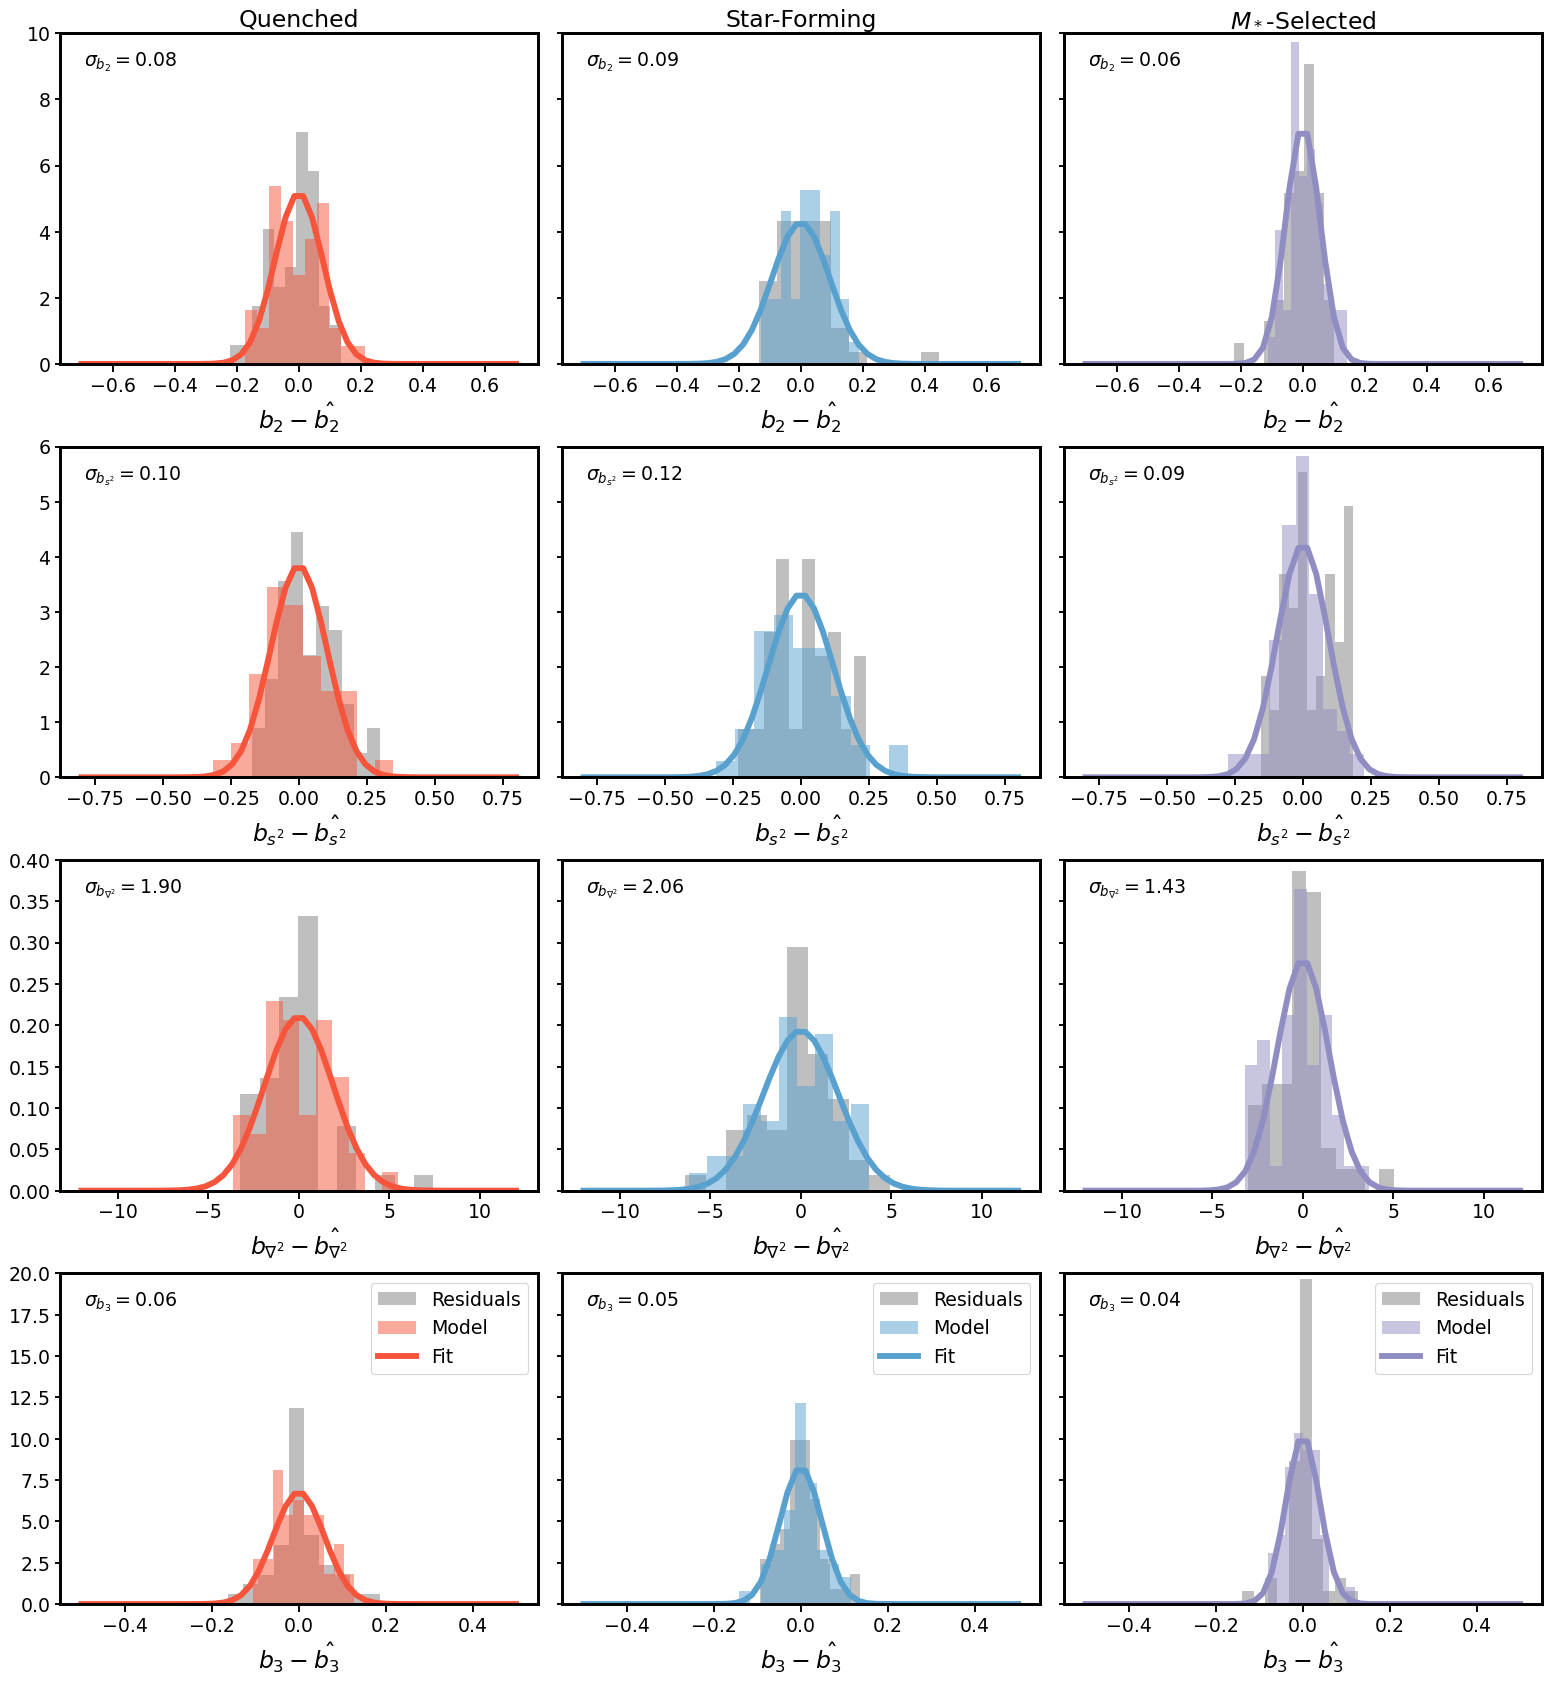

In [11]:
plt.figure(figsize = (22.5,24))
grid = gridspec.GridSpec(4, 3)
grid.update(wspace = 0.05, hspace = 0.25)

ylims = (0, 10), (0, 6), (0, 0.4), (0, 20)
idx = [[0,3,6,9],[1,4,7,10],[2,5,8,11]]
for color, plot_color, title, k in zip(['red', 'blue', 'total'], colors_cmap_patch, labels, range(len(labels))):        

    for i, xlim, ylim in zip(range(len(ylabel)), [(-0.7, 0.7), (-0.8, 0.8), (-12, 12), (-0.5, 0.5)], ylims):

        grid0 = plt.subplot(grid[i, k])
        polyfit = np.polynomial.polynomial.polyval(data[color][0], c[color][i+1])
        sigma = np.std(data[color][i+1]-polyfit)
        grid0.hist(data[color][i+1]-polyfit, density = True, color = 'grey', alpha = 0.5, label = 'Residuals')
        x = np.linspace(xlim[0], xlim[1])
        grid0.hist(norm.rvs(scale = sigma, size = len(polyfit)), density = True, alpha = 0.5, color = plot_color, label = 'Model')
        grid0.plot(x, norm.pdf(x, scale = np.std(data[color][i+1]-polyfit)), color = plot_color, linewidth = 5, label = 'Fit')
        grid0.text(0.05, 0.9, '$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)
        grid0.set_xlabel(ylabel_res[i])
        if i == 0:
            grid0.set_title(title)
        grid0.set_ylim(ylim)
        if k!=0:
            grid0.set_yticklabels([])
        if i == 3:
            plt.legend(loc='upper right')
            
plt.show()

# Figure 14: Consolidate into a single figure!
### Curve fit to all of the data together

In [12]:
color = 'all'
covvals_array[color] = np.load(home+'data/priors/covvals.npy')
data[color], errors[color], c[color], pcov[color] = dict(), dict(), dict(), dict()
for j in range(len(files)):

    data[color][j] = np.load(home+'data/priors/'+files[j]+'.npy')
    errors[color][j] = [np.sqrt(np.diag(i))[j] for i in covvals_array[color]]

    if j>=1:
        c[color][j], pcov[color][j] = curve_fit(f, data[color][0], data[color][j], p0=np.ones(order[j]+1), sigma = np.array(errors[color][j]))

<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:68: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:68: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_135128/1257116108.py:51: SyntaxWarning: invalid escape sequence '\s'
  grid0.text(0.025, 0.855, ylabel[i]+'$(b_1)=$'+fit[i]+'\n$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)
/tmp/ipykernel_135128/1257116108.py:68: SyntaxWarning: invalid escape sequence '\s'
  second_legend = grid0.legend(custom_lines, ['mean', '1$\sigma$'], loc = 'lower left')


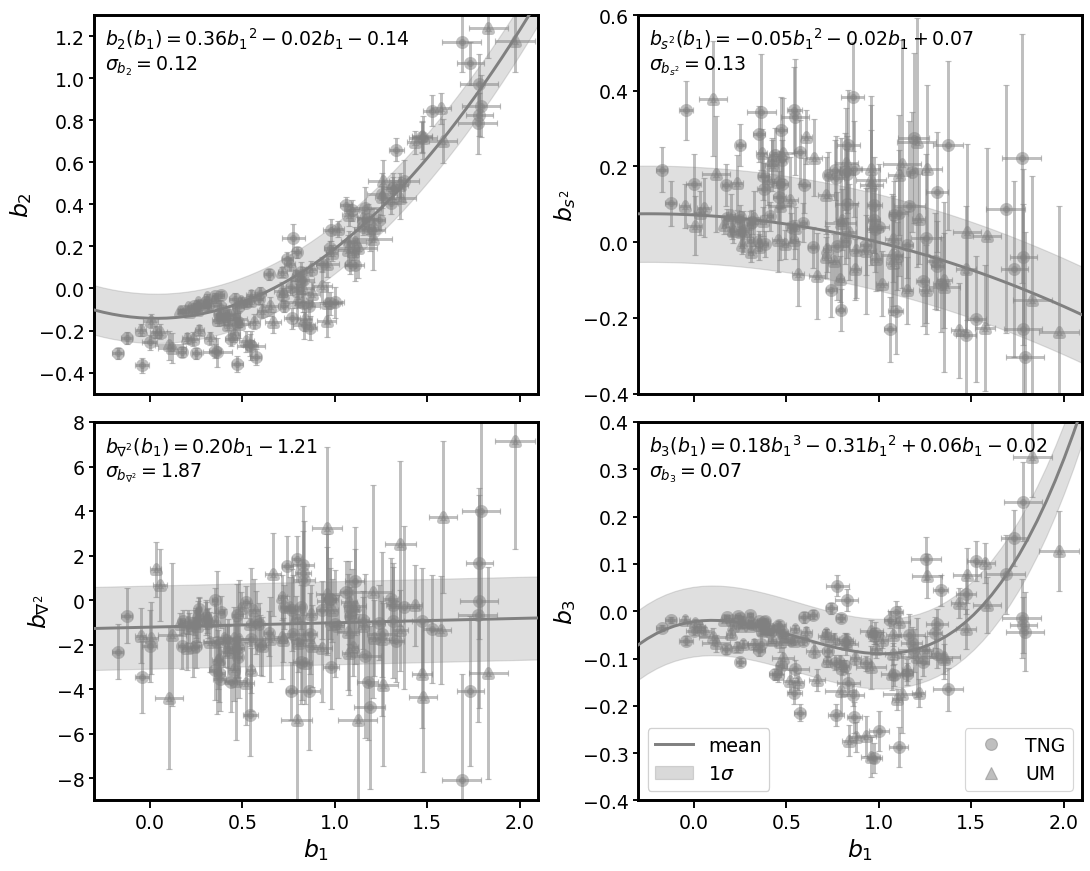

In [13]:
plt.figure(figsize = (30/2,24/2))
grid = gridspec.GridSpec(2, 2)
grid.update(wspace = 0.225, hspace = 0.075)

# plot all
xlim = -0.3, 2.1 
idx = [0,1,2,3]
color = 'all'
fit = ['${:.2f}{{b_1}}^2{:+.2f}b_1{:+.2f}$'.format(c[color][1][2], c[color][1][1], c[color][1][0]), 
   '${:.2f}{{b_1}}^2{:+.2f}b_1{:+.2f}$'.format(c[color][2][2], c[color][2][1], c[color][2][0]), 
   '${:.2f}b_1{:+.2f}$'.format(c[color][3][1], c[color][3][0]), 
   '${:.2f}{{b_1}}^3{:+.2f}{{b_1}}^2{:+.2f}b_1{:+.2f}$'.format(c[color][4][3], c[color][4][2], c[color][4][1], c[color][4][0])]

for i, ylim in zip(range(len(ylabel)), [(-0.5, 1.3), (-0.4, 0.6), (-9, 8), (-0.4, 0.4)]):

    grid0 = plt.subplot(grid[idx[i]])
    polyfit = np.polynomial.polynomial.polyval(b1_L_fit, c[color][i+1])
    sigma = np.std(data[color][i+1]-np.polynomial.polynomial.polyval(data[color][0], c[color][i+1]))
    grid0.plot(b1_L_fit, polyfit, color = color_thiswork, linewidth = 2.5, linestyle = '-', zorder = 4)
    grid0.fill_between(b1_L_fit, polyfit-sigma, polyfit+sigma, color = color_thiswork, alpha = 0.25) 

    for plot_color, title in zip(['red', 'blue', 'total'], labels):        
        for hodtype, marker in zip(hodtypes, ['o','^']):
            for density, label in zip(['low', 'high', 'medium'], [hodtype+', '+title, None, None]):

                for z, j in zip(z_array, range(len(z_array))):
                    
                    biasval = np.load(home + 'data/AB_mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+plot_color+'_'+
                                  density+'.npy')

                    # load error bars
                    err = error(hodtype, z, plot_color, density, AB = 'AB_')

                    grid0.scatter(biasval[:,0][k1_idx], biasval[:,i+1][k1_idx], color = color_thiswork, marker = marker, 
                              linewidth = 5, zorder = 3, alpha = 0.5) 
                    grid0.errorbar(biasval[:,0][k1_idx], biasval[:,i+1][k1_idx], xerr = err[0], yerr = err[i+1], 
                               color = color_thiswork, fmt = 'none', elinewidth = 2.5, capsize = 2.5, alpha = 0.5)
                        
                    # plot original
                    biasval = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+plot_color+'_'+
                                  density+'.npy')

                    # load error bars
                    err = error(hodtype, z, plot_color, density) 

                    grid0.scatter(biasval[:,0][k1_idx], biasval[:,i+1][k1_idx], color = color_thiswork, marker = marker, 
                              linewidth = 5, zorder = 3, alpha = 0.5) 
                    grid0.errorbar(biasval[:,0][k1_idx], biasval[:,i+1][k1_idx], xerr = err[0], yerr = err[i+1], 
                               color = color_thiswork, fmt = 'none', elinewidth = 2.5, capsize = 2.5, alpha = 0.5)

    grid0.text(0.025, 0.855, ylabel[i]+'$(b_1)=$'+fit[i]+'\n$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)
    if i>1:
        grid0.set_xlabel('$b_1$')
    else:
        grid0.set_xticklabels([])
    grid0.set_ylabel(ylabel[i])
    grid0.set_xlim(np.array(xlim))
    grid0.set_ylim(np.array(ylim))
                
# plot by galaxy type
custom_lines = [Line2D([0], [0], color = color_thiswork, alpha=0.5, markersize = 10, marker = 'o', linestyle = 'None'), 
                Line2D([0], [0], color = color_thiswork, alpha=0.5, markersize = 10, marker = '^', linestyle = 'None')]
second_legend = grid0.legend(custom_lines, hodtypes, loc = 'lower right')
grid0.add_artist(second_legend)

custom_lines = [Line2D([0], [0], color = color_thiswork, markersize = 10, linewidth = 2.5, linestyle = '-'), 
                mpatches.Patch(color=color_thiswork, alpha = 0.25)]
second_legend = grid0.legend(custom_lines, ['mean', '1$\sigma$'], loc = 'lower left')
grid0.add_artist(second_legend)

plt.savefig(home + 'figures/Figure14.pdf', dpi = 300, bbox_inches='tight')
plt.show()

### Check that the residuals are Gaussian

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_135128/481079312.py:16: SyntaxWarning: invalid escape sequence '\s'
  grid0.text(0.05, 0.9, '$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)


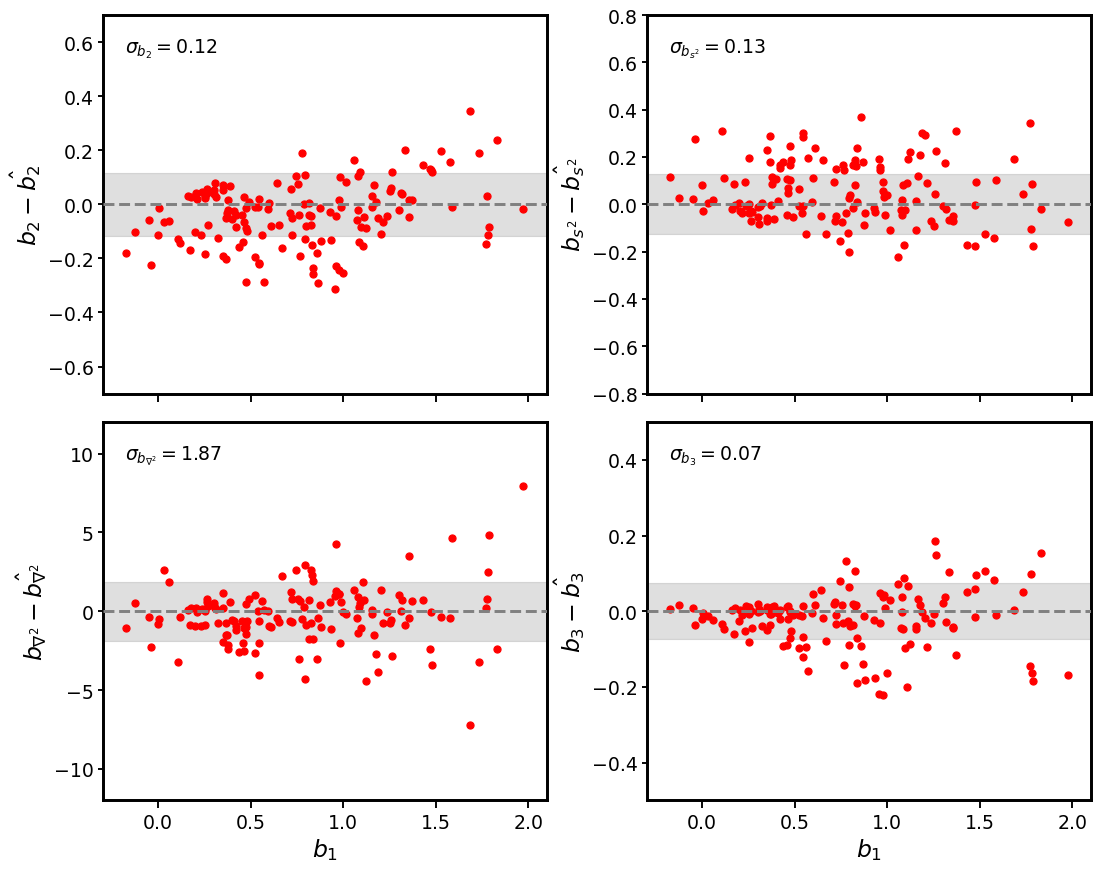

In [14]:
plt.figure(figsize = (15,12))
grid = gridspec.GridSpec(2, 2)
grid.update(wspace = 0.225, hspace = 0.075)

for i, ylim in zip(range(len(ylabel)), [(-0.7, 0.7), (-0.8, 0.8), (-12, 12), (-0.5, 0.5)]): 

    grid0 = plt.subplot(grid[i])
    polyfit = np.polynomial.polynomial.polyval(data[color][0], c[color][i+1])
    sigma = np.std(data[color][i+1]-polyfit)
    grid0.axhline(0, color = color_thiswork, linewidth = 2.5, linestyle = '--', zorder = 4)
    grid0.fill_between(b1_L_fit, -sigma, sigma, color = color_thiswork, alpha = 0.25) 
    grid0.scatter(data[color][0], data[color][i+1] - polyfit, color = 'red')              
    grid0.set_ylabel(ylabel_res[i])
    grid0.set_xlim(np.array(xlim))
    grid0.set_ylim(np.array(ylim))
    grid0.text(0.05, 0.9, '$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)

    if i<2:
        grid0.set_xticklabels([])
    else:
        grid0.set_xlabel('$b_1$')

plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_135128/4180924706.py:14: SyntaxWarning: invalid escape sequence '\s'
  grid0.text(0.05, 0.9, '$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)


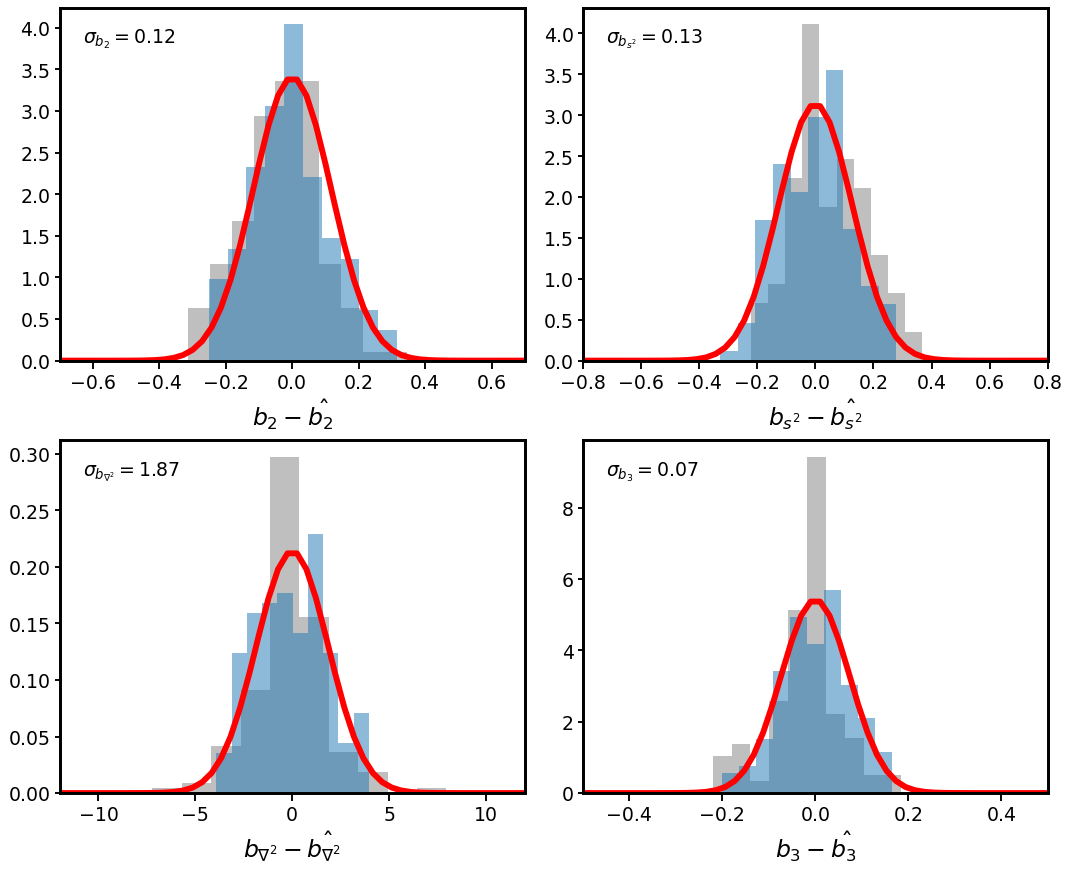

In [15]:
plt.figure(figsize = (15,12))
grid = gridspec.GridSpec(2, 2)
grid.update(wspace = 0.125, hspace = 0.225)

for i, ylim in zip(range(len(ylabel)), [(-0.7, 0.7), (-0.8, 0.8), (-12, 12), (-0.5, 0.5)]):

    grid0 = plt.subplot(grid[i])
    polyfit = np.polynomial.polynomial.polyval(data[color][0], c[color][i+1])
    sigma = np.std(data[color][i+1]-polyfit)
    grid0.hist(data[color][i+1]-polyfit, density = True, color = 'gray', alpha = 0.5)
    x = np.linspace(ylim[0], ylim[1])
    grid0.hist(norm.rvs(scale = np.std(data[color][i+1]-polyfit), size = len(polyfit)), density = True,  alpha = 0.5)
    grid0.plot(x, norm.pdf(x, scale = np.std(data[color][i+1]-polyfit)), color = 'red', linewidth = 5)
    grid0.text(0.05, 0.9, '$\sigma_{}={:.2f}$'.format('{'+ylabel[i][1:-1]+'}', sigma), transform=grid0.transAxes, fontsize = 16)
    grid0.set_xlabel(ylabel_res[i])
    grid0.set_xlim(np.array(ylim))

plt.show()

# Figure 15: Set priors on all galaxies for $b_1(z)$
### Define a function

In [16]:
def err_prop(a, b, sigma_a, sigma_b):
    return np.sqrt(((1+a)/(1+b))**2*((sigma_a/(1+a))**2+(sigma_b/(1+b))**2))

### Use curvefit

In [17]:
color = 'all'    
redshift = dict()
b1_dict, b1_err_dict, yerr_dict = dict(), dict(), dict()
c_sigma, pcov_sigma = dict(), dict()

data[color][0] = np.load(home+'data/priors/x_scatter_b1.npy')
errors[color][0] = [np.sqrt(np.diag(i))[0] for i in covvals_array[color]]
redshift[color] = np.load(home+'data/priors/redshift.npy')

b1_dict[color] = np.ravel([[data[color][0][i:i+2]]*4 for i in np.arange(18)*8])
b1_err_dict[color] = np.ravel([[errors[color][0][i:i+2]]*4 for i in np.arange(18)*8])
yerr_dict[color] = err_prop(data[color][0], b1_dict[color], errors[color][0], b1_err_dict[color])

z_axis = [0,0.5,1,1.5]
c[color][0], pcov[color][0] = curve_fit(f, redshift[color], (1+data[color][0])/(1+b1_dict[color]), p0=np.ones(3), sigma = yerr_dict[color])
sigma = [np.std(np.array((1+data[color][0])/(1+b1_dict[color])-np.polynomial.polynomial.polyval(redshift[color], c[color][0]))[redshift[color]==i]) for i in [0,0.5,1,1.5]]
c_sigma[color], pcov_sigma[color] = curve_fit(f, z_axis, sigma, p0=np.ones(2))

<>:58: SyntaxWarning: invalid escape sequence '\s'
<>:72: SyntaxWarning: invalid escape sequence '\s'
<>:58: SyntaxWarning: invalid escape sequence '\s'
<>:72: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_135128/3226779685.py:58: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.025, 0.85, r'$B_1(z)=$'+fit+'\n$\sigma_{B_1}(z)=$'+fit_sigma, transform=fig.axes[0].transAxes, fontsize = 16)
/tmp/ipykernel_135128/3226779685.py:72: SyntaxWarning: invalid escape sequence '\s'
  second_legend = plt.legend(custom_lines, ['mean', '1$\sigma$'], loc = 'lower right')


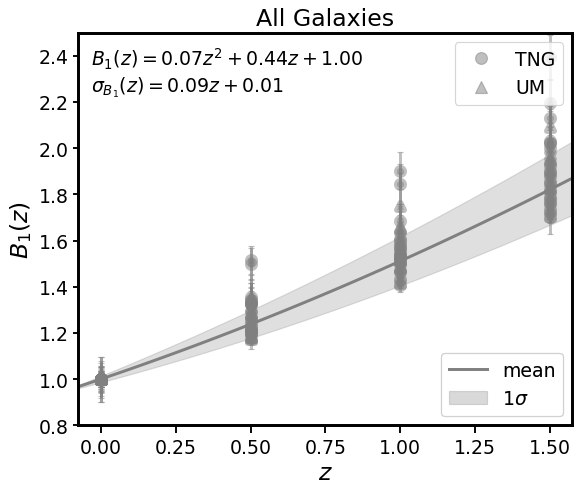

In [18]:
ylabel = ['$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
xlim = -0.3, 2.1 
zlim = redshift[color][0]-0.075, redshift[color][-1]+0.075
z_axis = np.linspace(zlim[0], zlim[1])
labels = ['Quenched', 'Star-Forming', '$M_*$-Selected']
colors_cmap_patch = [color_red, color_blue, color_total] 
hodtypes = ['TNG', 'UM']
k1_idx = np.load(home + 'data/k1_idx.npy')

fig = plt.figure(figsize = (22.5/3,6))        
color='all'

fit = '${:.2f}z^2{:+.2f}z{:+.2f}$'.format(c[color][0][2], c[color][0][1], c[color][0][0])
fit_sigma = '${:.2f}z{:+.2f}$'.format(c_sigma[color][1], c_sigma[color][0])

polyfit = np.polynomial.polynomial.polyval(z_axis, c[color][0])
polyfit_sigma = np.polynomial.polynomial.polyval(z_axis, c_sigma[color])
plt.plot(z_axis, polyfit, color = color_thiswork, linewidth = 2.5, linestyle = '-', zorder = 0)
plt.fill_between(z_axis, polyfit-polyfit_sigma, polyfit+polyfit_sigma, color = color_thiswork, alpha = 0.25) # 'silver', alpha = 0.5

for bias_color, plot_color, title in zip(['red', 'blue', 'total'], [color_thiswork,color_thiswork,color_thiswork], labels):        
    for hodtype, marker in zip(hodtypes, ['o','^']):
        for density, alpha in zip(['low', 'medium', 'high'],[0.33, 0.67, 1]):
            for z, j in zip(z_array, range(len(z_array))):

                biasval = np.load(home + 'data/AB_mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+bias_color+'_'+
                              density+'.npy')
                biasval_z0 = np.load(home + 'data/AB_mpibiasval_'+hodtype+'hod_z0_Ndown1_nbias5_'+bias_color+'_'+
                              density+'.npy')

                # load error bars
                err = error(hodtype, z, bias_color, density, AB = 'AB_')
                err_z0 = error(hodtype, 0, bias_color, density, AB = 'AB_')
                yerr = err_prop(biasval[:,0][k1_idx], biasval_z0[:,0][k1_idx], err[0], err_z0[0])

                alpha = 0.5
                plt.scatter(z, (1+biasval[:,0][k1_idx])/(1+biasval_z0[:,0][k1_idx]), color = plot_color, marker = marker, 
                          linewidth = 5, zorder = 3, alpha = alpha) 
                plt.errorbar(z, (1+biasval[:,0][k1_idx])/(1+biasval_z0[:,0][k1_idx]), yerr = np.abs(yerr),
                           color = plot_color, fmt = 'none', elinewidth = 2.5, capsize = 2.5, alpha = alpha)

                # plot original
                biasval = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+bias_color+'_'+
                              density+'.npy')
                biasval_z0 = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z0_Ndown1_nbias5_'+bias_color+'_'+
                              density+'.npy')

                # load error bars
                err = error(hodtype, z, bias_color, density)
                err_z0 = error(hodtype, 0, bias_color, density)
                yerr = err_prop(biasval[:,0][k1_idx], biasval_z0[:,0][k1_idx], err[0], err_z0[0])

                plt.scatter(z, (1+biasval[:,0][k1_idx])/(1+biasval_z0[:,0][k1_idx]), color = plot_color, marker = marker, 
                          linewidth = 5, zorder = 3, alpha = alpha) 
                plt.errorbar(z, (1+biasval[:,0][k1_idx])/(1+biasval_z0[:,0][k1_idx]), yerr = np.abs(yerr), #err[0] 
                           color = plot_color, fmt = 'none', elinewidth = 2.5, capsize = 2.5, alpha = alpha)

plt.text(0.025, 0.85, r'$B_1(z)=$'+fit+'\n$\sigma_{B_1}(z)=$'+fit_sigma, transform=fig.axes[0].transAxes, fontsize = 16)
plt.ylabel('$B_1(z)$')        
plt.xlim(zlim)
plt.ylim(0.8,2.5)
plt.xlabel('$z$')
plt.title('All Galaxies')

custom_lines = [Line2D([0], [0], color = color_thiswork, alpha=0.5, markersize = 10, marker = 'o', linestyle = 'None'), 
                Line2D([0], [0], color = color_thiswork, alpha=0.5, markersize = 10, marker = '^', linestyle = 'None')]
second_legend = plt.legend(custom_lines, hodtypes, loc = 'upper right')
fig.add_artist(second_legend)

custom_lines = [Line2D([0], [0], color = color_thiswork, markersize = 10, linewidth = 2.5, linestyle = '-'), 
                mpatches.Patch(color=color_thiswork, alpha = 0.25)]
second_legend = plt.legend(custom_lines, ['mean', '1$\sigma$'], loc = 'lower right')
fig.add_artist(second_legend)

plt.savefig(home + 'figures/Figure15.pdf', dpi = 300, bbox_inches='tight')
plt.show()

### Check that the residuals are Gaussian

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_135128/2033309376.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(z_axis, -np.array(polyfit_sigma), polyfit_sigma, color = color_thiswork, alpha = 0.25, label = '$1\sigma$')
/tmp/ipykernel_135128/2033309376.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.9, '$\sigma_{B_1}(z)=$'+fit_sigma, transform=fig.axes[0].transAxes, fontsize = 16)
/tmp/ipykernel_135128/2033309376.py:17: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$B_1-\hat{B_1}$')


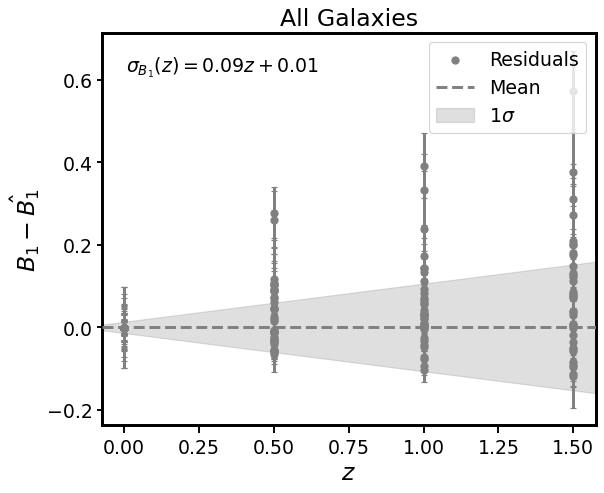

In [19]:
xlims = [-1.5,2.5],[-1000,1000],[-2,2.5]
z_axis = np.linspace(zlim[0], zlim[1])
color_thiswork = 'grey'

color = 'all'
fig = plt.figure(figsize = (22.5/3,6))        
fit = '${:.2f}z^2{:+.2f}z{:+.2f}$'.format(c[color][0][2], c[color][0][1], c[color][0][0])
fit_sigma = '${:.2f}z{:+.2f}$'.format(c_sigma[color][1], c_sigma[color][0])
polyfit = np.polynomial.polynomial.polyval(redshift[color], c[color][0])
sigma = [np.std(np.array((1+data[color][0])/(1+b1_dict[color])-polyfit)[redshift[color]==i]) for i in [0,0.5,1,1.5]]
polyfit_sigma = np.polynomial.polynomial.polyval(z_axis, c_sigma[color])
plt.scatter(redshift[color], (1+data[color][0])/(1+b1_dict[color]) - polyfit, color = plot_color, label = 'Residuals')
plt.axhline(0, color = color_thiswork, linewidth = 2.5, linestyle = '--', zorder = 4, label = 'Mean')
plt.fill_between(z_axis, -np.array(polyfit_sigma), polyfit_sigma, color = color_thiswork, alpha = 0.25, label = '$1\sigma$') 
plt.errorbar(redshift[color], (1+data[color][0])/(1+b1_dict[color])-polyfit, yerr = yerr_dict[color], color = plot_color, fmt = 'none', elinewidth = 2.5, capsize = 2.5)
plt.text(0.05, 0.9, '$\sigma_{B_1}(z)=$'+fit_sigma, transform=fig.axes[0].transAxes, fontsize = 16)
plt.ylabel('$B_1-\hat{B_1}$')
plt.xlabel('$z$')
plt.xlim(zlim)
plt.title('All Galaxies')
plt.legend(loc = 'upper right')

plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_135128/1124203040.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.9, '$\sigma_{{B_1}}(z)=${:.2f}'.format(sigma), transform=fig.axes[0].transAxes, fontsize = 16)
/tmp/ipykernel_135128/1124203040.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('$B_1-\hat{B_1}$')


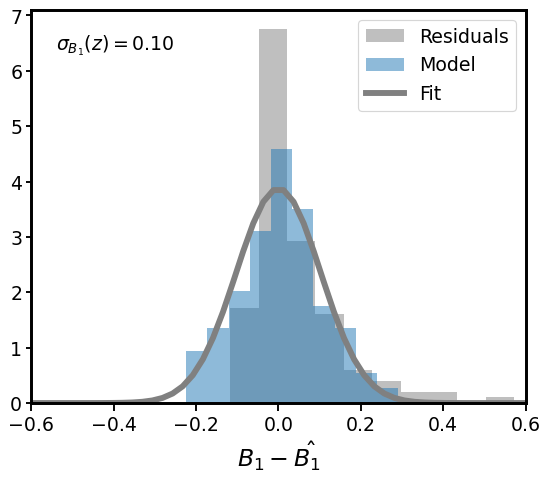

In [20]:
fig = plt.figure(figsize = (22.5/3,6))            
xlim = -0.6,0.6
color = 'all'

fit = '${:.2f}z^2{:+.2f}z{:+.2f}$'.format(c[color][0][2], c[color][0][1], c[color][0][0])
polyfit = np.polynomial.polynomial.polyval(redshift[color], c[color][0])
sigma = np.std((1+data[color][0])/(1+b1_dict[color])-polyfit)
plt.hist((1+data[color][0])/(1+b1_dict[color])-polyfit, density = True, color = 'grey', alpha = 0.5, label = 'Residuals')
plt.hist(norm.rvs(scale = sigma, size = len(polyfit)), density = True, alpha = 0.5, label = 'Model')
x = np.linspace(xlim[0],xlim[1])
plt.plot(x, norm.pdf(x, scale = sigma), color = plot_color, linewidth = 5, label = 'Fit')
plt.text(0.05, 0.9, '$\sigma_{{B_1}}(z)=${:.2f}'.format(sigma), transform=fig.axes[0].transAxes, fontsize = 16)
plt.xlabel('$B_1-\hat{B_1}$')
plt.xlim(xlim[0],xlim[1])
plt.legend()

plt.show()

### Check how much the fit to $\sigma(z)$ differs from the measured $\sigma(z)$

In [21]:
z_axis = [0,0.5,1,1.5]
color = 'all'
polyfit_sigma = np.polynomial.polynomial.polyval(z_axis, c_sigma[color])
sigma = [np.std(np.array((1+data[color][0])/(1+b1_dict[color])-np.polynomial.polynomial.polyval(redshift[color], c[color][0]))[redshift[color]==i]) for i in [0,0.5,1,1.5]]
print(polyfit_sigma-sigma)

[ 0.01365719 -0.02067329  0.000375    0.0066411 ]
